<a href="https://colab.research.google.com/github/yesolcho/Python-class/blob/main/Python_Day6_%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 머신러닝의 프로세스

    문제파악 -> 데이터 탐색 -> 전처리 -> 모델학습 -> 예측 

현재 문제파악 ~ 전처리는 사람의 영역이다. 컴퓨터가 거의 못함.

In [ ]:
# 붓꽃 분류


# 필요한 모듈 읽어오기

import pandas as pd   # 분석모듈
import numpy as np   # 계산 모듈
from sklearn import datasets   # 사이킷런 : 붓꽃 데이터를 갖고 있음. 그 외 다양한 모듈들을 갖고 있다.

iris = datasets.load_iris()
print(iris)


{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [ ]:
print(iris['DESCR'])

# instance: 150개의 샘플이 들어있다. (3클래스에 각각 50개의 데이터가 들어있다.)

# 설명변수(Attribute information)
# sepal length in cm : 꽃받침의 길이
# sepal width in cm : 꽃받침의 너비
# petal length in cm : 꽃잎의 길이
# petal width in cm : 꽃잎의 너비

# 목표변수 (class)
# Iris-Setosa
# Iris-Versicolour
# Iris-Virginica


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
print("데이터셋의 크기: ", iris['target'].shape)   # 딕셔너리
# 튜플 안에 값이 1개면 쉼표가 붙는다.

print("데이터셋의 내용: ", iris['target'])

데이터셋의 크기:  (150,)
데이터셋의 내용:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
print("데이터셋의 크기: ", iris['data'].shape)
print("데이터셋의 내용: ", iris['data'])

# 문제와 답이 떨어져있음.
# 보기 편하게 df로 바꿔서

데이터셋의 크기:  (150, 4)
데이터셋의 내용:  [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]


In [ ]:
# 데이터 프레임으로 전환

df = pd.DataFrame(iris['data'], columns = iris['feature_names'])
df.head()   # 위쪽 일부만 출력하기

# iris['feature_names'] 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# columns 이름 정리

df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df.head()



,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# 이제 해당 데이터의 답이 뭔지 추가하기

df['target'] = iris['target']   # df의 타겟을 iris의 타겟으로 해라.
df.head()
df.tail()   # df의 끝 일부만 확인

,sepal_length,sepal_width,petal_length,petal_width,target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [ ]:
# Step 1 문제점 파악
# 데이터를 사용하여 붓꽃의 종류를 분류할 수 있는 모델을 만들자.

print(df)

     sepal_length  sepal_width  petal_length  petal_width  target
0             5.1          3.5           1.4          0.2       0
1             4.9          3.0           1.4          0.2       0
2             4.7          3.2           1.3          0.2       0
3             4.6          3.1           1.5          0.2       0
4             5.0          3.6           1.4          0.2       0
..            ...          ...           ...          ...     ...
145           6.7          3.0           5.2          2.3       2
146           6.3          2.5           5.0          1.9       2
147           6.5          3.0           5.2          2.0       2
148           6.2          3.4           5.4          2.3       2
149           5.9          3.0           5.1          1.8       2

[150 rows x 5 columns]


In [ ]:
# Step 2 데이터 탐색

# 기본정보
df.info()

# 문제 4개, 답 1개
# null : 결측치 (빈칸)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
df.describe()   # 데이터의 통계 정보 요약

# 평균, 표편, 최소, 최대 등 통게 정보 요약

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
# 결측치 null
# 데이터 분석이나 머신러닝에서는 결측치의 처리가 상당히 중요하다

df.isnull().sum()   # null이 있는지 확인.

# null이 없으니 전처리 과정에서 결측치 처리가 필요 없음을 알 수 있음

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

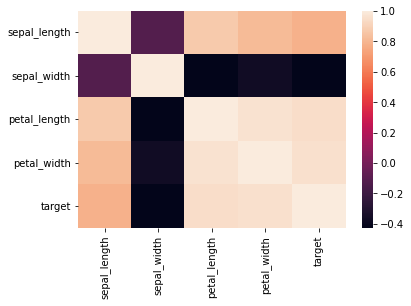

In [ ]:
# 시각화
# 파이썬에서는 matplotlib와 seaborn을 사용하여 데이터를 시각화 할 수 있다.
# 전자는 많이 사용되는 거 반드시 사용, 후자는 좀 더 세련된 거. 

import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(data = df.corr())   # corr() : 상관계수. "데이터 프레임의 상관계수로 그림을 그려라."
plt.show()


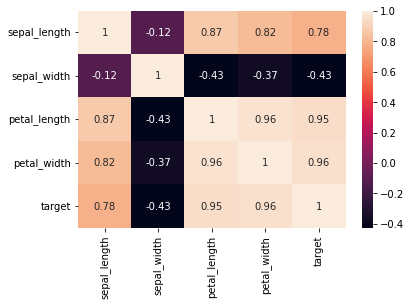

In [ ]:
sns.heatmap(data = df.corr(), annot = True)
plt.show()

# 자기 자신은 1
# 종(Target)을 결정하는 데 Petal_length는 95%, Petal_width는 96%의 영향을 미치고 있음
# 보통은 이렇게 큰 수치가 나오진 않는다.

# 따라서 꽃잎의 길이와 너비로 머신러닝을 시켜야 하겠구나 판단 가능

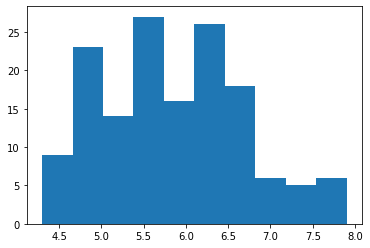

In [ ]:
plt.hist(x='sepal_length', data=df)
plt.show()   # 그림만 보여줌

# 꽃잎 길이의 분포를 보여준다.

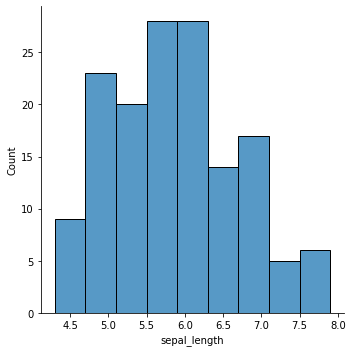

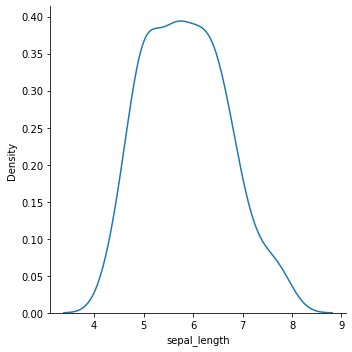

In [ ]:
sns.displot(x='sepal_length', data = df)  # 막대

sns.displot(x='sepal_length', kind = 'kde', data = df)  #선

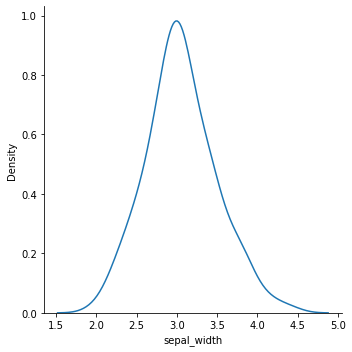

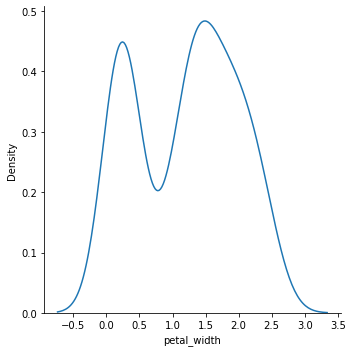

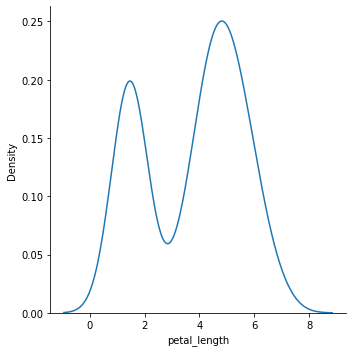

In [ ]:
sns.displot(x='sepal_width', kind = 'kde', data = df) 

# sepal은 정규분표를 이루고 있다. 

# 반면 petal은 정규분포가 아니다.
sns.displot(x='petal_width', kind = 'kde', data = df) 
sns.displot(x='petal_length', kind = 'kde', data = df) 


# 정규분포: 평균을 중심으로 뒤집어놓은 종 모양의 분포를 이루고 있음
# 어떤 데이터들이 정규분포를 이루고 있으면 정확할 확률이 높다.
# 따라서 정규분포를 이루는 데이터를 머신러닝에 사용하자.

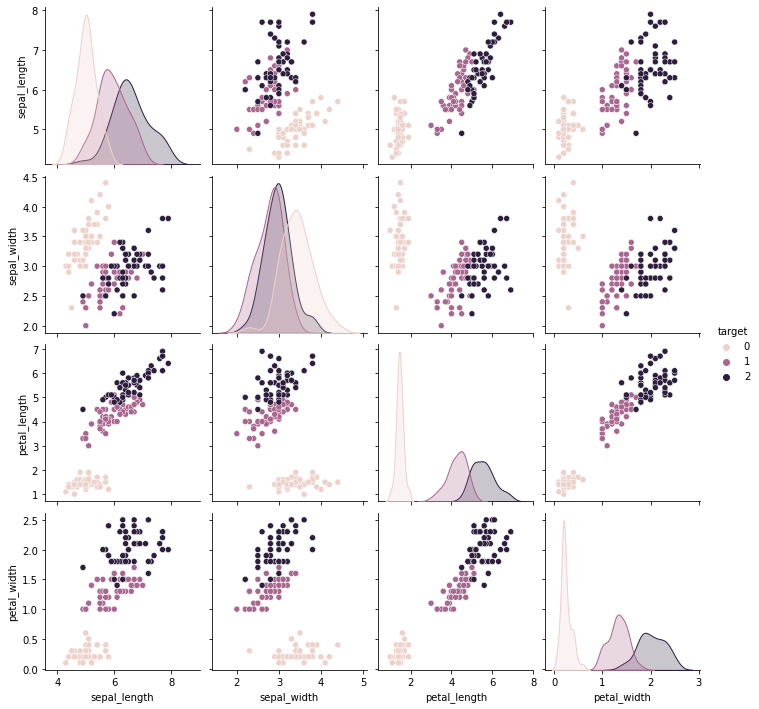

In [ ]:
sns.pairplot(df, hue='target')

# 답(target, 종) 분류가 잘 된 데이터를 확인할 수 있다.

In [ ]:
# Step 3. 전처리

# 원래 전처리 과정(결측치 처리, 이상치 처리 등)은 가장 비중이 크고 다양하다. 오늘은 전처리는 간단히 살펴보고 모델학습에 비중을 늘리도록 한다. 


# 훈련용과 검증용 데이터셋 분할
from sklearn.model_selection import train_test_split

# 여기서 X는 대문자, y는 소문자
X_data = df.loc[:,'petal_length':'petal_width']   # 문제. loc : 데이터프레임을 자르는 함수 [행,열]. 여기서 행은 150개 전체
y_data = df.loc[:, 'target']   # 답 추출
# X는 상수. 상수에 따라 달라지는 변수 y


# 훈련용 문제, 훈련용 답, 검증용 문제, 검증용 답
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, shuffle=True, random_state=20)   

# 8:2의 비율로 훈련용과 검증용을 자른다. 
# 그리고 데이터셋을 섞어라(현재는 타겟으로 오름차순되어있으니까.)
# 랜덤으로 섞어 분리하는데 항상 일정하게 고정시켜 뽑아 일정한 값이 나오게 한다. 이해가 잘 안됨. 숫자는 의미가 없다.

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


# 왜 0이 나오지...

(120, 2) (120,)
(30, 2) (30,)


# Step 4 모델 학습

# KNN algorithm

예측(분류)하려는 데이터 X가 주어졌을 때, 기존 데이터 중 속성이 비슷한 K개의 이웃을 찾는다.

데이터 X의 가까운 주변을 둘러싼 K개가 많이 속해 있는 목표 클래스를 예측값으로 결정하게 된다.

주의) 가까운 이웃을 3으로 설정할 때는 삼각형 클래스에 속하는 데이터가 2개로 가장 많고, 가까운 이웃을 5개로 설정할 때는 사각형 클래스에 속하는 데이터가 3개로 가장 많게 된다.

따라서 K값에 따라 KNN모델이 예측하는 클래스가 달라질 수 있다.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier # KNN모듈 가져오기
knn = KNeighborsClassifier(n_neighbors= 1)         # 객체 생성하면서 K값 설정. 이웃(K)가 n개인 객체 생성.
knn.fit(X_train, y_train)                          # 훈련용 문제와 답안지 

y_knn_pred = knn.predict(X_test)                   # 검증용 문제지만 제공

from sklearn.metrics import accuracy_score         # 채점 모듈
knn_acc = accuracy_score(y_test, y_knn_pred)       # 실제 답안지와 비교
 
print(knn_acc)                                     # 비교 결과 정확도

# k = 3    0.9333333333333333
# k = 5    0.9333333333333333
# k = 20   0.9666666666666667
# k = 50   0.9333333333333333

0.9333333333333333


# Decision Tree 의사결정나무 algorithm

딥러닝에서도 이 알고리즘을 사용한다. 
2진 탐색기 (Y or N)

의사결정나무 모델은 이진 트리 알고리즘을 사용한다. 

트리의 각 분기점에는 데이터 셋의 속성 값을 하나씩 위치 시킨다.

임의의 조건을 스스로 설정하여 게속 2개의 줄기로 가지를 나누면서 데이터를 구분한다.

이때 각 분기점에서 분류가 가장 잘되는 최적의 기준을 찾는 과정이 중요하다.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=1, random_state=0)
dtc.fit(X_train, y_train)

y_dtc_pred = dtc.predict(X_test)

from sklearn.metrics import accuracy_score
dtc_acc = accuracy_score(y_test, y_dtc_pred)

print(dtc_acc)

# max_depth=3 / 0.9333333333333333
# max_depth=1 / 0.6333333333333333

0.6333333333333333


# SVM (Support Vector Machine) Algorithm

좌표 평면에 데이터들을 각각의 점으로 표시하고, 각 데이터가 속하는 클래스 별로 군집을 이룬다라고 가정한다.

각 군집 간의 거리를 최대한 멀리 유지하는 **경계선**을 찾는다. 이렇게 각 군집을 서로 확연하게 구분지을 수 있다.

새로운 데이터가 주어졌을 때 공간의 좌표에서 어느 군집에 속하는지 분류할 수 있게된다.

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')   # 언제나 rbf : Radial Basis Function / 언제나 곡선 형태로 경계면을 나눠준다.
svc.fit(X_train, y_train)

y_svc_pred = svc.predict(X_test)

from sklearn.metrics import accuracy_score
svc_acc = accuracy_score(y_test, y_svc_pred)

print(svc_acc)

0.9333333333333333


# Ensemble 앙상블 - Voting

**앙상블**은 여러 모델을 결합하여 성능을 높이는 방법이다. 하나의 모델에 의존하는 것보다 여러 모델의 예측을 결합하여 최종 예측값을 결정하게 된다. 

그 중 **Voting**은 여러개의 모델이 예측한 값을 종합하여 최종 예측값을 결정하는데, 모델이 예측한 값 중에서 **다수결**로 최종 분류 클래스를 정한다.

- Voting 옵션

      hard: 모델들이 예측한 값 중에서 다수결로 최종 분류 클래스를 정함
      soft:  모델 분류 클래스 별로 예측 확률을 평균하여 최종 클래스를 정함

'hard'를 늘 사용하면 된다.


In [ ]:
from sklearn.ensemble import VotingClassifier
hvc = VotingClassifier(estimators=[('KNN',knn), ('SVM', svc), ('DT', dtc)], voting = 'hard')   # 튜플로 모델이 들어간다.

hvc.fit(X_train, y_train)

y_hvc_pred = hvc.predict(X_test)

hvc_acc = accuracy_score(y_test, y_hvc_pred)
print(hvc_acc)

0.9333333333333333


# Step 5. 예측


In [ ]:
#knn
knntest = knn.predict([[9.5, 5.4]])   # 새롭게 모델을 만듦. 새로운 데이터를 넣어본다.
print(knntest)
  
#dtc
dtctest = dtc.predict([[9.5, 5.4]])
print(dtctest)

#svc
svctest = svc.predict([[9.5, 5.4]])
print(svctest)

#hvc
hvctest = hvc.predict([[9.5, 5.4]])
print(hvctest)


[2]
[1]
[2]
[2]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Decision

# 타이타닉 생존 예측 경진대회

      데이터 다운로드 -> 압축 풀기 -> 코랩 왼쪽의 파일 아이콘 -> 파일 드래그

파일이 영구 보존되지 않는다. 런타임 끝나면 삭제되는 불편함.

In [ ]:
# 타이타닉

#훈련용/검증용/제출 데이터셋 읽어오기
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('submission.csv')

In [ ]:
train.shape

# 891개 데이터, 12열

(891, 12)

In [ ]:
test.shape

(418, 11)

In [ ]:
submission.shape

(418, 2)

In [ ]:
train.head()

# Survived : 0 사망 / 1 생존
# Pclass : 1 > 2 > 3
# Name : 성, 이름, 사회적 지위
# Sex : male / female 단, 글자로 된 데이터는 숫자로 바꿔 학습을 시켜야만 한다.
# Age : 나이. 나이는 단계가 많기 때문에 카테고리화 시키는 것이 좋다.
# Fare : 요금. 금액차가 크기 때문에 오류가 생길 수 있음. 데이터를 단순화 시키는 전처리가 필요하다. ex) 1불과 1만불

# 데이터를 학습시키기 전에 다양한 방식의 전처리 과정이 Veryveryvery 중요하다!

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test.head()

# 검증용 데이터는 생존정보가 없다. 이것을 예측해서 제출한다.

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train.describe()

# describe() : 숫자 데이터의 요약 통게 정보를 제공하는 함수
# Age에 결측치가 많다.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


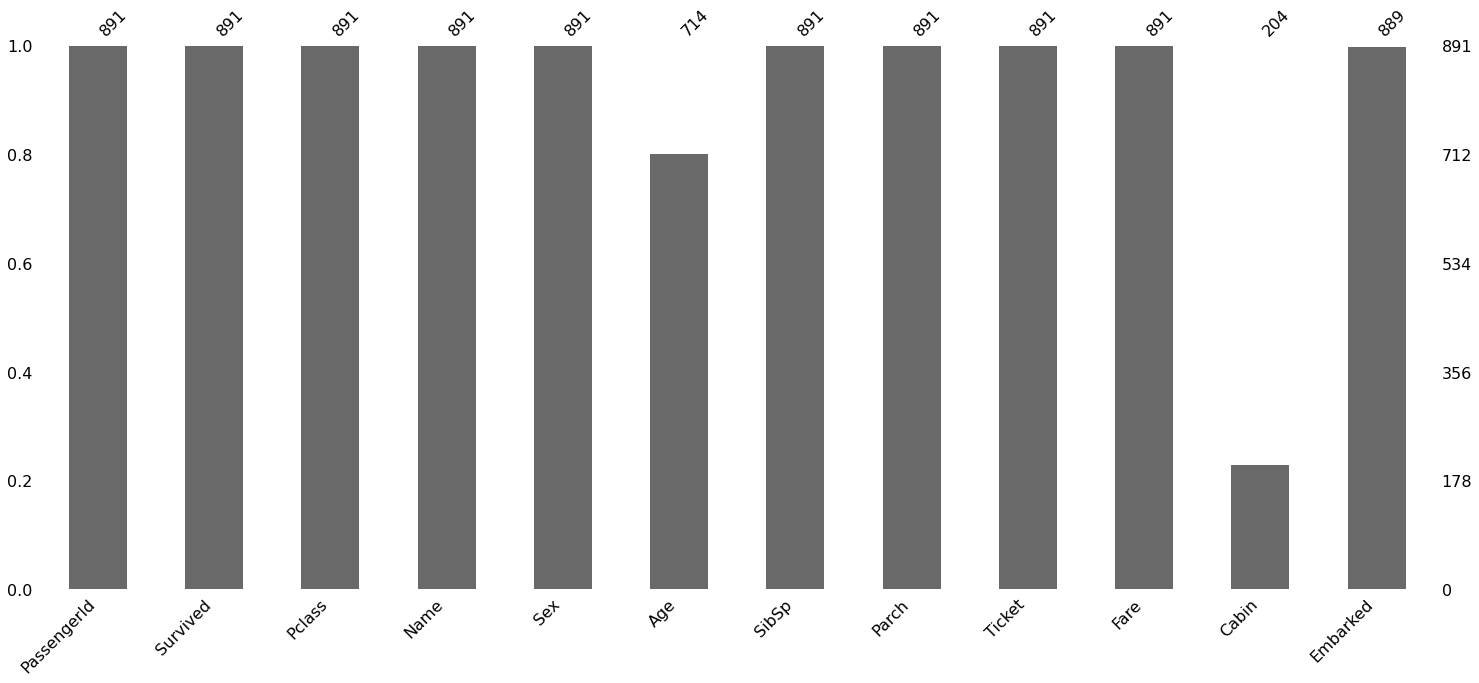

In [ ]:
# 결측치 확인

import missingno as msno
msno.bar(train)

# 결측치가 3개나 있음

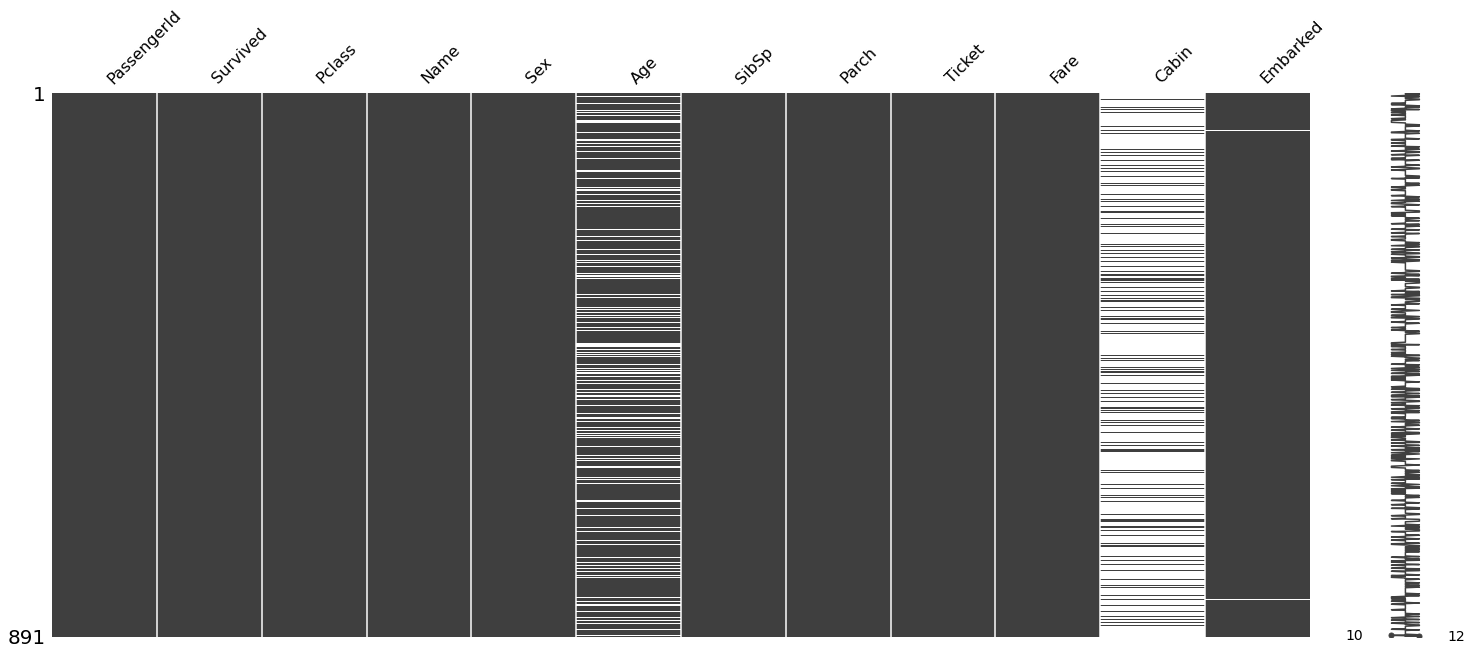

In [ ]:
msno.matrix(train)

In [ ]:
train.corr()

# 상관관계를 보면 생존에 Pclass가 가장 큰 영향을 미치고 있음을 알 수 있다.
# 생존은 음의 상관관계를 갖는다. (1>2>3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


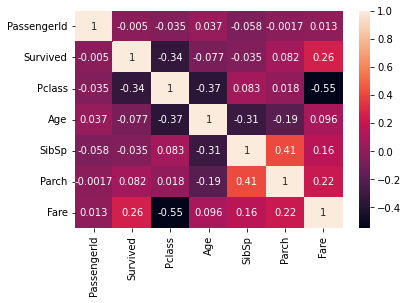

In [ ]:
import seaborn as sns
sns.heatmap(train.corr(), annot=True)

# Pclass와 Fare가 큰 영향을 미치고 있음

In [ ]:
train['Sex'] = train['Sex'].replace('male',0)
test['Sex'] = test['Sex'].replace('male',0)

train['Sex'] = train['Sex'].replace('female',1)
test['Sex'] = test['Sex'].replace('female',1)

검증용 데이터도 학습용으로 쓸 수 있다. 데이터는 많을수록 정확하니까. 

하지만 추후 나눠줘야하기 때문에 나누기 편하게 합쳐줘야한다.

In [ ]:
# 학습용 + 검증용

train['TrainSplit'] = 'Train'
test['TrainSplit'] = 'Test'

# 똑같은 열 이름에 값만 다르게

In [ ]:
data = pd.concat([train, test],axis=0)

# 열 이름이 같으니 위아래로 붙인다.

In [ ]:
data.tail()

# passengerld를 확인하면 1309개까지 있는 걸 볼 수 있다. 합쳐짐!

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TrainSplit
413,1305,NaN,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,S,Test
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,C,Test
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Test
416,1308,NaN,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,NaN,S,Test
417,1309,NaN,3,"Peter, Master. Michael J",0,NaN,1,1,2668,22.3583,NaN,C,Test


In [ ]:
# 의미있는 숫자만 뽑아낸다

data_num = data.loc[:, ['Pclass','Sex','Age','SibSp','Parch','Fare','Survived']]
data_num

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,0,22.0,1,0,7.2500,0.0
1,1,1,38.0,1,0,71.2833,1.0
2,3,1,26.0,0,0,7.9250,1.0
3,1,1,35.0,1,0,53.1000,1.0
4,3,0,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...
413,3,0,NaN,0,0,8.0500,NaN
414,1,1,39.0,0,0,108.9000,NaN
415,3,0,38.5,0,0,7.2500,NaN
416,3,0,NaN,0,0,8.0500,NaN


In [ ]:
# Age와 Fare에 있던 결측치 처리하기

data_num['Age'] = data_num['Age'].fillna(data_num['Age'].mean())   # Age 데이터 결측치를 Age 데이터의 평균으로 채워라

data_num['Fare'] = data_num['Fare'].fillna(data_num['Fare'].mode()[0])   # 요금은 평균보다는 '최빈값'이 더 명확하다. 구간마다 나눠진 값이니까.

# mode()[n] : 최빈값 중 n번쨰


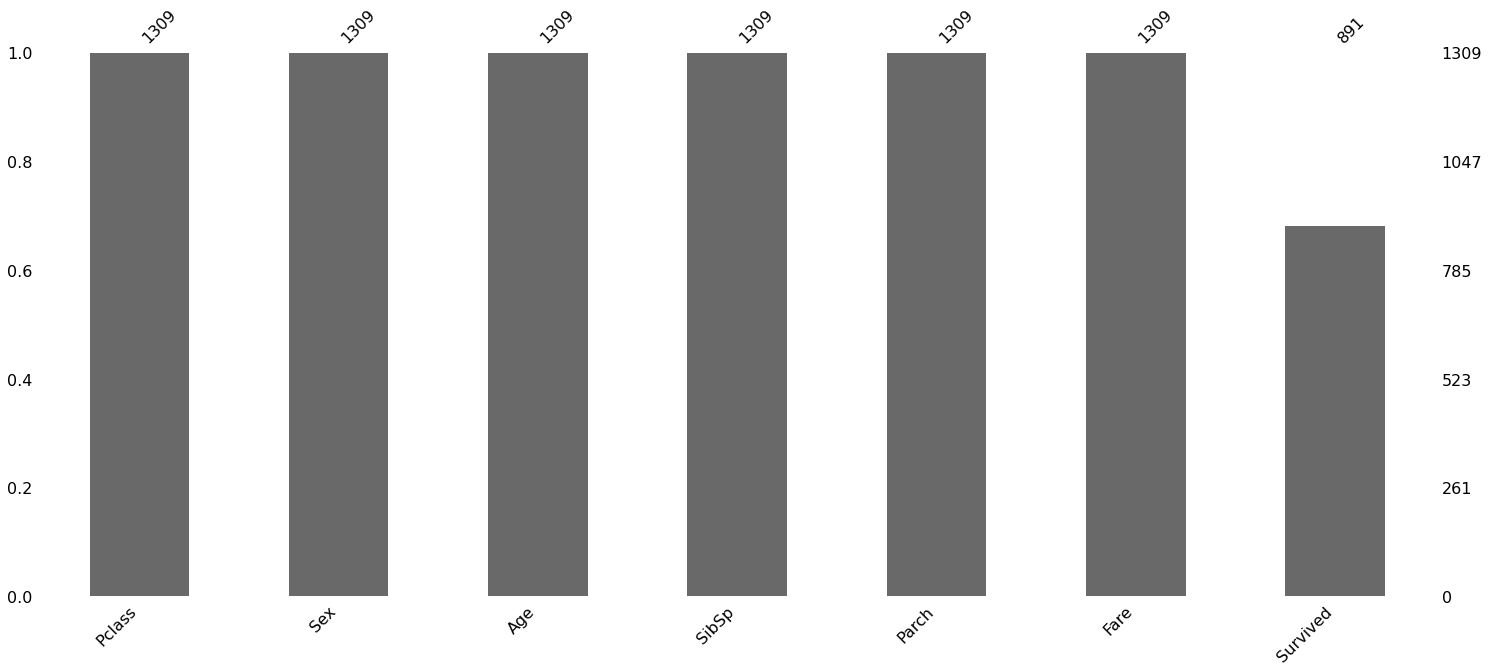

In [ ]:
msno.bar(data_num)

# 채워진 것을 확인할 수 있다.

In [ ]:
# 최종 결측값 확인

data_num.isnull().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Survived    418
dtype: int64

In [ ]:
# 학습용 데이터와 검증용 데이터로 구분

X_train = data_num.loc[data['TrainSplit']=='Train',['Pclass','Sex','Age','SibSp','Parch','Fare']]
y_train = data_num.loc[data['TrainSplit']=='Train','Survived']

X_test = data_num.loc[data['TrainSplit']=='Test',['Pclass','Sex','Age','SibSp','Parch','Fare']]



In [ ]:
print(data_num)

     Pclass  Sex        Age  SibSp  Parch      Fare  Survived
0         3    0  22.000000      1      0    7.2500       0.0
1         1    1  38.000000      1      0   71.2833       1.0
2         3    1  26.000000      0      0    7.9250       1.0
3         1    1  35.000000      1      0   53.1000       1.0
4         3    0  35.000000      0      0    8.0500       0.0
..      ...  ...        ...    ...    ...       ...       ...
413       3    0  29.881138      0      0    8.0500       NaN
414       1    1  39.000000      0      0  108.9000       NaN
415       3    0  38.500000      0      0    7.2500       NaN
416       3    0  29.881138      0      0    8.0500       NaN
417       3    0  29.881138      1      1   22.3583       NaN

[1309 rows x 7 columns]


In [ ]:
# 학습용 데이터를 훈련용 80% 검증용 20%로 분할하자

from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True, random_state=1)

In [ ]:
# DT

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=1, random_state=0)
dtc.fit(X_tr, y_tr)

y_dtc_pred = dtc.predict(X_val)

from sklearn.metrics import accuracy_score
dtc_acc = accuracy_score(y_val, y_dtc_pred)

print(dtc_acc)

# 61정도 나와야함

0.776536312849162


In [ ]:
# knn

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 3)         
knn.fit(X_tr, y_tr)                         

y_knn_pred = knn.predict(X_val)                   

from sklearn.metrics import accuracy_score      
knn_acc = accuracy_score(y_val, y_knn_pred)

print(knn_acc)                                

0.7150837988826816


In [ ]:
# SVM

from sklearn.svm import SVC     
svc = SVC(kernel='rbf') 
svc.fit(X_tr, y_tr)

y_svc_pred = svc.predict(X_val)   

from sklearn.metrics import accuracy_score      
svc_acc = accuracy_score(y_val, y_svc_pred)      
 
print(svc_acc) 

0.6536312849162011


In [ ]:
# XG부스트

import xgboost as xgb
from xgboost import plot_importance
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

dtrain = xgb.DMatrix(data=X_train, label=y_train)
dval = xgb.DMatrix(data=X_val, label=y_val)
dtest = xgb.DMatrix(data=X_test)

params = {'max_depth' : 3,
         'eta' : 0.1, 
         'objective' : 'binary:logistic',
         'eval_metric' : 'logloss',
         'early_stoppings' : 100 }
         
xgb_model = xgb.train(params = params, dtrain = dtrain, num_boost_round = 400, 
                        early_stopping_rounds = 100, evals=[(dtrain,'train'),(dval,'eval')])


[0]	train-logloss:0.646173	eval-logloss:0.651415
Multiple eval metrics have been passed: 'eval-logloss' will be used for early stopping.

Will train until eval-logloss hasn't improved in 100 rounds.
[1]	train-logloss:0.608453	eval-logloss:0.61792
[2]	train-logloss:0.576236	eval-logloss:0.589761
[3]	train-logloss:0.549251	eval-logloss:0.566532
[4]	train-logloss:0.527145	eval-logloss:0.547479
[5]	train-logloss:0.508085	eval-logloss:0.530809
[6]	train-logloss:0.491783	eval-logloss:0.516312
[7]	train-logloss:0.477409	eval-logloss:0.50463
[8]	train-logloss:0.465614	eval-logloss:0.494301
[9]	train-logloss:0.455479	eval-logloss:0.486026
[10]	train-logloss:0.446346	eval-logloss:0.478316
[11]	train-logloss:0.43908	eval-logloss:0.473141
[12]	train-logloss:0.432384	eval-logloss:0.467926
[13]	train-logloss:0.426788	eval-logloss:0.463819
[14]	train-logloss:0.421875	eval-logloss:0.459777
[15]	train-logloss:0.416912	eval-logloss:0.455679
[16]	train-logloss:0.412367	eval-logloss:0.449824
[17]	train-lo

In [ ]:
y_pred_probs = xgb_model.predict(dtest)

submission['Survived'] = y_pred_probs
submission.to_csv('submission4st.csv', index=False)

# overfitting

학습을 너무 시켜서 클래스 근처에만 가도 같다고 인식하는 것.

해결책: 데이터의 양을 늘린다.

엑스지부스트...?

In [ ]:
y_test_pred = dtc.predict(X_test)

In [ ]:
# submission에 정리

submission['Survived'] = y_test_pred

In [ ]:
# 제출용 파일 만들기

submission.to_csv('submission3st.csv', index=False)

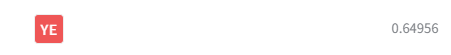

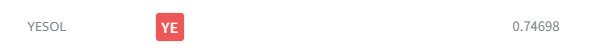

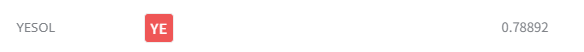

# 정확도를 올리는 방법

1. 알고리즘을 변경

2. 파라미터를 조정

3. 피처 엔지니어링 

  ex) 문자 데이터를 수치화, 값을 평탄화(스케일링)


모델 성능을 개선할 수 있는 다양한 방법들이 존재한다.

1. 레이블 인코딩(문자->숫자)

2. 원-핫 인코딩(문자->숫자) : 모든 문자를 0과 1로 표현

    문자열 데이터를 숫자 데이터로 변환하는 방법. 하나의 열을 범주(feature) 개수 만큼의 열로 분할하여 해당하는 열에는 1을 입력하고, 나머지에는 0을 입력해 그 차이를 일정하게 유지시킬 수 있게 된다. 

In [ ]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

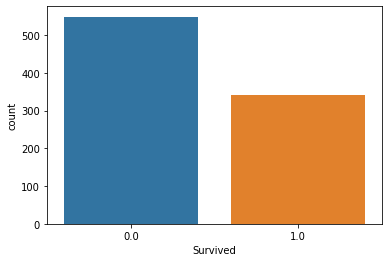

In [ ]:
sns.countplot(x='Survived', data=data[data['TrainSplit']=='Train'])

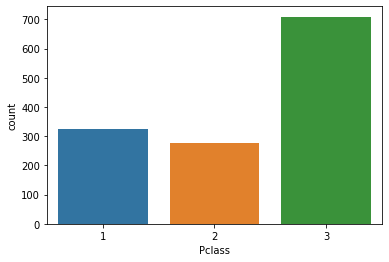

In [ ]:
sns.countplot(x='Pclass', data=data)

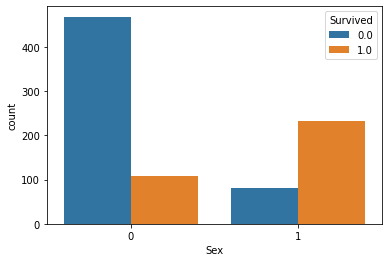

In [ ]:
sns.countplot(x='Sex', data=data, hue='Survived')

In [ ]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,TrainSplit,...,Cab_F G63,Cab_F G73,Cab_F2,Cab_F33,Cab_F38,Cab_F4,Cab_G6,Cab_T,Emb_Q,Emb_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,Train,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,Train,...,0,0,0,0,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,Train,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,Train,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,Train,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,13.0000,Train,...,0,0,0,0,0,0,0,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,30.0000,Train,...,0,0,0,0,0,0,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,23.4500,Train,...,0,0,0,0,0,0,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,30.0000,Train,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# one-hot encoding

# train.head()

onehot_prefix = []

for col in ['Ticket','Cabin','Embarked']:
  train[col] = train[col].astype('category')   # col 모두 뽑아서 범주화
  train = pd.get_dummies(train, columns=[col], prefix=col[:3], drop_first=True)   # prefix : 접두어
  # 새로운 열을 만들고 각각에 이름을 붙여줌.
  onehot_prefix.append(col[:3])   # 나중에 사용하기 편하게 이름 만든 걸 리스트로 만듦. 리스트 이름을 통째로 넣으면 될듯.


KeyError: ignored

내일밤 12시까지 